In [134]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [135]:
# Exp 1- 8 as per executed in labs Inputs will be varied practicals hard coded , some with tensorflow and keras CNN, rnn, autoencoder and backpropogation can be implemented on datasets mostly mnist, iris, catand dog Sometimes u need to take inputs of dataset by creating shapes So there are variations while taking inputs Instructions while coming to the lab.

In [136]:
# Experiment 1: Perceptron Learning Algorithm

## Experiment 2

In [137]:
# Experiment 2: Packpropagation Algorithm
# Forward and Backward Pass

# 0 - 0 - 0
# 0 - 0 - |

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_pass(input, weight, bias, activation):
    layer = np.dot(weight, input) + bias
    return float(activation(layer)[0])

def error_calculation(excepted_output, output):
    return 0.5 * np.sum((excepted_output - output) ** 2)

def update_weights_inner(output, target, hidden, input, weight_affecting, weight_i, learning_rate):
    error_i_1 = (output[0] - target[0]) * (output[0] * (1 - output[0])) * weight_affecting[0] * (hidden[0] * (1 - hidden[0])) * input
    error_i_2 = (output[1] - target[1]) * (output[1] * (1 - output[1])) * weight_affecting[1] * (hidden[0] * (1 - hidden[0])) * input
    error_i = error_i_1 + error_i_2
    weight = weight_i - learning_rate * error_i
    return weight

def update_weights_outer(output, target, input, weight_i, learning_rate):
    error_i = (output - target) * (output * (1 - output)) * input
    weight = weight_i - learning_rate * error_i
    return weight

def backward_pass(weights, biases, inputs, hidden, excepted_output, output):
    w5 = update_weights_outer(output[0], excepted_output[0], hidden[0], weights[4], 0.6)
    w6 = update_weights_outer(output[0], excepted_output[0], hidden[1], weights[5], 0.6)
    w7 = update_weights_outer(output[1], excepted_output[1], hidden[1], weights[6], 0.6)
    w8 = update_weights_outer(output[0], excepted_output[0], hidden[1], weights[7], 0.6)

    w1 = update_weights_inner(output, excepted_output, hidden, inputs[0], [weights[4], weights[6]], weights[0], 0.6)
    w2 = update_weights_inner(output, excepted_output, hidden, inputs[1], [weights[5], weights[7]], weights[2], 0.6)
    w3 = update_weights_inner(output, excepted_output, hidden, inputs[0], [weights[4], weights[6]], weights[1], 0.6)
    w4 = update_weights_inner(output, excepted_output, hidden, inputs[1], [weights[5], weights[7]], weights[3], 0.6)

    return np.array([w1, w2, w3, w4, w5, w6, w7, w8])

inputs = [0.1, 0.5]
weights = [0.1, 0.3, 0.2, 0.4 , 0.5, 0.6, 0.7, 0.8]
biases = [0.25, 0.25, 0.35, 0.35]
excepted_output = [0.05, 0.95]

hidden_network1 = forward_pass(inputs, weights[:2], biases[:1], sigmoid)
hidden_network2 = forward_pass(inputs, weights[2:4], biases[1:2], sigmoid)
hidden = [hidden_network1, hidden_network2]
output_network1 = forward_pass(hidden, weights[4:6], biases[2:3], sigmoid)
output_network2 = forward_pass(hidden, weights[6:8], biases[3:4], sigmoid)
output = [output_network1, output_network2]

error = error_calculation(np.array(excepted_output), np.array(output))

# updated_weights = backward_pass(weights, biases, inputs, hidden, excepted_output, output)
# print("Updated Weights: ", updated_weights)

epochs = 47000

for i in range(epochs):
    hidden_network1 = forward_pass(inputs, weights[:2], biases[:1], sigmoid)
    hidden_network2 = forward_pass(inputs, weights[2:4], biases[1:2], sigmoid)
    hidden = [hidden_network1, hidden_network2]
    output_network1 = forward_pass(hidden, weights[4:6], biases[2:3], sigmoid)
    output_network2 = forward_pass(hidden, weights[6:8], biases[3:4], sigmoid)
    output = [output_network1, output_network2]

    error = error_calculation(np.array(excepted_output), np.array(output))

    updated_weights = backward_pass(updated_weights, biases, inputs, hidden, excepted_output, output)
    weights = updated_weights
    if i % 100 == 0:
        print(f"Epoch {i}: Error: {error}")
    if error < 0.01:
        break
print("Final Output: ", output)
print("Final Weights: ", weights)
print("Final Error: ", error)



Epoch 0: Error: 0.24908954146037615
Epoch 100: Error: 0.21000260497749984
Epoch 200: Error: 0.21000260497749984
Epoch 300: Error: 0.21000260497749984
Epoch 400: Error: 0.21000260497749984
Epoch 500: Error: 0.21000260497749984
Epoch 600: Error: 0.21000260497749984
Epoch 700: Error: 0.21000260497749984
Epoch 800: Error: 0.21000260497749984
Epoch 900: Error: 0.21000260497749984
Epoch 1000: Error: 0.21000260497749984
Epoch 1100: Error: 0.21000260497749984
Epoch 1200: Error: 0.21000260497749984
Epoch 1300: Error: 0.21000260497749984
Epoch 1400: Error: 0.21000260497749984
Epoch 1500: Error: 0.21000260497749984
Epoch 1600: Error: 0.21000260497749984
Epoch 1700: Error: 0.21000260497749984
Epoch 1800: Error: 0.21000260497749984
Epoch 1900: Error: 0.21000260497749984
Epoch 2000: Error: 0.21000260497749984
Epoch 2100: Error: 0.21000260497749984
Epoch 2200: Error: 0.21000260497749984
Epoch 2300: Error: 0.21000260497749984
Epoch 2400: Error: 0.21000260497749984
Epoch 2500: Error: 0.2100026049774998

## Experiment 3

Input Image: 
 [[ 96 165  59 237 132 175 106  55 151]
 [159  15 230 223 253 185 212 226 128]
 [ 41  36  82  46  46 237 205 105  80]
 [250  77  25   3  70 129 109  44  75]
 [232 180 106 172 243  91 160 176 217]
 [ 20 131 248 144  51 212 233 217  86]
 [147  96 134   3 159 170 124 211  60]
 [182 236 186  76 162  45  86  26 141]
 [  9 205  10  34 195  12 250 231  89]]
Kernel: 
 [[ 1  3  1]
 [ 2  0  0]
 [-1  1 -2]]


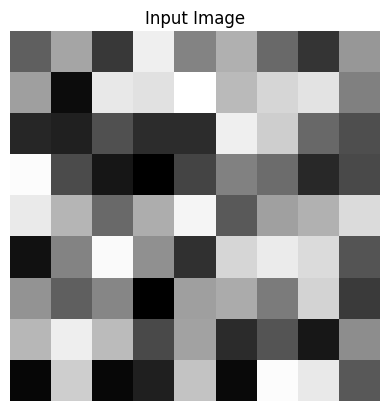

Convolution Output: 
 [[ 799  563 1234  780 1050  676  586]
 [ 293  942 1154 1068  953 1413 1213]
 [ 467   64    0  316  630  932  400]
 [ 585  344  110  169  747  269  448]
 [ 599  964  912 1096  541  703 1338]
 [ 637 1009  565  511  949 1457  876]
 [1109  710  308  939  434  619  792]]


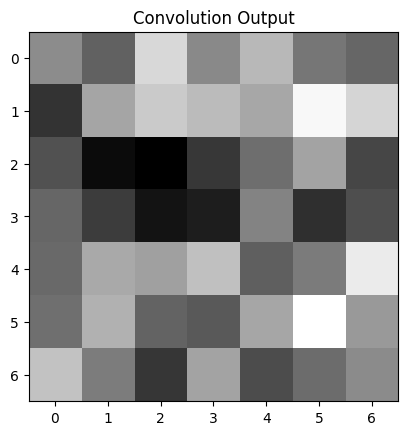

Max Pooling Output: 
 [[ 942 1234 1234 1068 1413 1413]
 [ 942 1154 1154 1068 1413 1413]
 [ 585  344  316  747  932  932]
 [ 964  964 1096 1096  747 1338]
 [1009 1009 1096 1096 1457 1457]
 [1109 1009  939  949 1457 1457]]


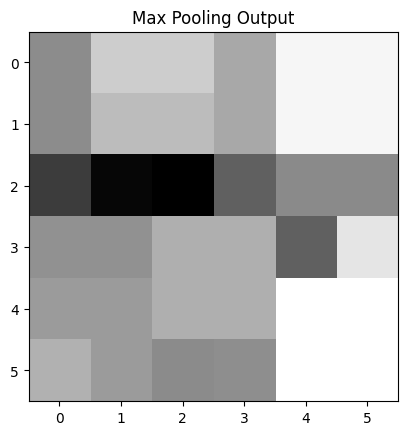

Flatten Output: 
 [ 942 1234 1234 1068 1413 1413  942 1154 1154 1068 1413 1413  585  344
  316  747  932  932  964  964 1096 1096  747 1338 1009 1009 1096 1096
 1457 1457 1109 1009  939  949 1457 1457]


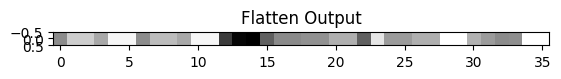

Dense Layer Output: 
 [19297.11425053]


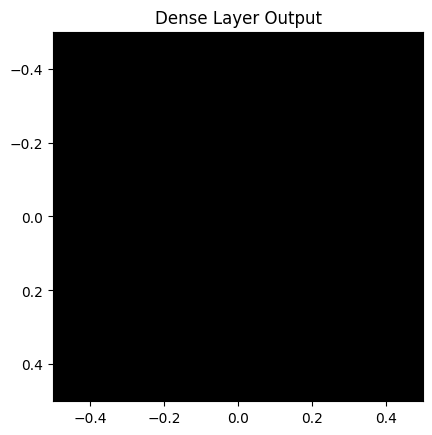

sigmoid Output:  [1.]


In [138]:
# Experiment 3: CNN

def convolve2d(image, kernel, stride):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    new_image = np.zeros((output_height, output_width)).astype(np.int32)
    for x in range(0, output_width):
        for y in range(0, output_height):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.int32)
    return new_image

def maxpooling(input, pool_size, stride):
    input_height, input_width = input.shape
    output_height = (input_height - pool_size) // stride + 1
    output_width = (input_width - pool_size) // stride + 1
    new_image = np.zeros((output_height, output_width)).astype(np.int32)
    for i in range(output_height):
        for j in range(output_width):
            new_image[i, j] = np.max(input[i * stride:i * stride + pool_size, j * stride:j * stride + pool_size])
    return new_image.astype(np.int32)


def flatten(input):
    return input.flatten()

def dense(input, weights, bias):
    return np.dot(weights, input) + bias

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def train_cnn(input, kernel, pool_size, stride):
    conv_output = convolve2d(input, kernel, stride)
    relu_output = relu(conv_output)
    print("Convolution Output: \n", relu_output)
    plt.imshow(relu_output, cmap='gray')
    plt.title("Convolution Output")
    plt.show()

    pool_output = maxpooling(relu_output, pool_size, stride)
    print("Max Pooling Output: \n", pool_output)
    plt.imshow(pool_output, cmap='gray')
    plt.title("Max Pooling Output")
    plt.show()

    flatten_output = flatten(pool_output)
    print("Flatten Output: \n", flatten_output)
    plt.imshow(flatten_output.reshape(1, -1), cmap='gray')
    plt.title("Flatten Output")
    plt.show()

    weights = np.random.rand(flatten_output.size)
    bias = np.random.rand(1)
    dense_output = dense(flatten_output, weights, bias)
    print("Dense Layer Output: \n", dense_output)
    plt.imshow(dense_output.reshape(1, -1), cmap='gray')
    plt.title("Dense Layer Output")
    plt.show()

    sigmoid_output = sigmoid(dense_output)
    return sigmoid_output
pool_size = 2
stride = 1
input = np.random.randint(0, 255, (9, 9)).astype(np.int32)
kernel = np.array([[1, 3, 1], 
                   [2, 0, 0], 
                   [-1, 1, -2]])
print("Input Image: \n", input)
print("Kernel: \n", kernel)
plt.imshow(input, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()
sigmoid_output = train_cnn(input, kernel, pool_size, stride)
print("sigmoid Output: ", sigmoid_output)


In [139]:
# Load MNIST dataset
data = mnist.load_data()
(x_train, y_train), (x_test, y_test) = data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9057 - loss: 0.3361 - val_accuracy: 0.9767 - val_loss: 0.0779
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9816 - loss: 0.0600 - val_accuracy: 0.9783 - val_loss: 0.0728
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9896 - loss: 0.0343 - val_accuracy: 0.9860 - val_loss: 0.0491
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9930 - loss: 0.0228 - val_accuracy: 0.9861 - val_loss: 0.0507
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9954 - loss: 0.0153 - val_accuracy: 0.9847 - val_loss: 0.0519
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9825 - loss: 0.0543  
Test accuracy: 0.9861999750137329


In [140]:
y_pred = model.predict(x_test)
predicted_classes = np.argmax(y_pred, axis=1)
print("Predicted classes: ", predicted_classes)
print("True classes: ", y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
Predicted classes:  [7 2 1 ... 4 5 6]
True classes:  [7 2 1 ... 4 5 6]


## Experiment 4

In [186]:
# Experiment 4: RNN

input_sentences = [
    "I love programming",
    "Python is great",
    "I enjoy learning new things",
    "TensorFlow is a powerful library",
    "Deep learning is fascinating"
]

def one_hot_encode(sentences):
    tokens = [word_tokenize(sentence.lower()) for sentence in sentences]
    vocab = set(word for sentence in tokens for word in sentence)
    print(len(vocab))
    word_to_index = {word: i for i, word in enumerate(vocab)}
    encoded = []
    for sentence in tokens:
        encoded_sentence = np.zeros(len(vocab))
        for word in sentence:
            encoded_sentence[word_to_index[word]] = 1
        encoded.append(encoded_sentence)
    return np.array(encoded)

def SimpleRNN(input):
    embeddings = one_hot_encode(input)

    input_size = embeddings.shape[1]
    hidden_size = 20
    output_size = 3
    weights_input = np.random.rand(input_size, hidden_size)
    weights_hidden = np.random.rand(hidden_size, hidden_size)
    weights_output = np.random.rand(hidden_size, output_size)
    biases_hidden = np.random.rand(hidden_size)
    biases_output = np.random.rand(output_size)
    hidden_state = np.zeros(hidden_size)
    outputs = []

    for t in embeddings:
        hidden_state = np.tanh(np.dot(t, weights_input) + np.dot(hidden_state, weights_hidden) + biases_hidden)
        output = np.dot(hidden_state, weights_output) + biases_output
        outputs.append(output)
    return np.array(outputs)

rnn_output = SimpleRNN(input_sentences)
print("RNN Output: \n", rnn_output)

16
RNN Output: 
 [[11.85487958  9.35496822 10.9557405 ]
 [12.22174019  9.87464461 11.48377886]
 [12.22174021  9.87464462 11.48377888]
 [12.22174021  9.87464462 11.48377888]
 [12.2217402   9.87464462 11.48377887]]


In [206]:
from keras.datasets import imdb
from keras.preprocessing import sequence

data = imdb.load_data(num_words=1000)
(x_train, y_train),(x_test, y_test) = data

model = Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.SimpleRNN(128))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.4965 - loss: 0.6969 - val_accuracy: 0.5278 - val_loss: 0.6898
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.5585 - loss: 0.6791 - val_accuracy: 0.6482 - val_loss: 0.6236
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.7117 - loss: 0.5695 - val_accuracy: 0.5798 - val_loss: 0.6610
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.7054 - loss: 0.5682 - val_accuracy: 0.6034 - val_loss: 0.6466
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.6853 - loss: 0.5819 - val_accuracy: 0.6760 - val_loss: 0.6054
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6773 - loss: 0.6039
Test accuracy: 0.6793199777603149


In [207]:
y_pred = model.predict(x_test)
predicted_classes = np.argmax(y_pred, axis=1)
print("Predicted classes: ", predicted_classes)
print("True classes: ", y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
Predicted classes:  [1 0 0 ... 1 0 1]
True classes:  [0 1 1 ... 0 0 0]


## Experiment 5